In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import minmax_scale
from sklearn.model_selection import train_test_split
from os.path import exists
from sklearn.externals import joblib
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
%run pathtodata.py
file_path = os.path.join(pathtodata(), 'poloniex_usdt_pairs.csv')
df = pd.read_csv(file_path).rename(columns={'Unnamed: 0':'Time'}).set_index('Time')


pd.to_datetime(df.index)
df[1:].apply(lambda x: pd.Series([float(i) for i in x]))
df.head()

/Users/david/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,USDT_BTC,USDT_BTC.1,USDT_BTC.2,USDT_XRP,USDT_XRP.1,USDT_XRP.2,USDT_BCH,USDT_BCH.1,USDT_BCH.2,USDT_ETH,...,USDT_ZEC.2,USDT_DASH,USDT_DASH.1,USDT_DASH.2,USDT_NXT,USDT_NXT.1,USDT_NXT.2,USDT_REP,USDT_REP.1,USDT_REP.2
Time,,,,,,,,,,,,,,,,,,,,,
NaN,quoteVolume,volume,price,quoteVolume,volume,price,quoteVolume,volume,price,quoteVolume,...,price,quoteVolume,volume,price,quoteVolume,volume,price,quoteVolume,volume,price
2017-01-01 00:00:00,5.59672254,5398.83711674,964.64262399,1569.50520479,10.17706057,0.0064842400000000005,NaN,NaN,NaN,10.82982506,...,48.03006375,0.31177786,3.53187151,11.32816651,0.0,0.0,0.0058979900000000005,4.4515247,16.99118095,3.81693511
2017-01-01 00:05:00,0.0872821,84.30211763,965.85803538,0.0,0.0,0.00648653,NaN,NaN,NaN,1.905818,...,47.99598877,0.0,0.0,11.34,3.74928786,0.02214978,0.00590773,0.6274922900000001,2.40788429,3.8373129500000003
2017-01-01 00:10:00,2.73736768,2638.6761714,963.94656468,0.0,0.0,0.00648653,NaN,NaN,NaN,52.23872359,...,47.87084582,0.0,0.0,11.34,0.0,0.0,0.00590773,0.0,0.0,3.8373129500000003
2017-01-01 00:15:00,3.55008694,3415.27230881,962.02497756,0.0,0.0,0.00648653,NaN,NaN,NaN,71.03174098,...,47.87084582,0.02109787,0.23851219,11.30503661,0.0,0.0,0.00590773,0.0,0.0,3.8373129500000003


In [3]:
df1 = df.iloc[1:,:3]
df1.head()

,USDT_BTC,USDT_BTC.1,USDT_BTC.2
Time,,,
2017-01-01 00:00:00,5.59672254,5398.83711674,964.64262399
2017-01-01 00:05:00,0.0872821,84.30211763,965.85803538
2017-01-01 00:10:00,2.73736768,2638.6761714,963.94656468
2017-01-01 00:15:00,3.55008694,3415.27230881,962.02497756
2017-01-01 00:20:00,0.08332327,80.28769065,963.56864844


In [4]:
y = df1['USDT_BTC.2'][1:-1].astype(dtype='float64')
display(y.head(), y.tail())

Time
2017-01-01 00:05:00    965.858035
2017-01-01 00:10:00    963.946565
2017-01-01 00:15:00    962.024978
2017-01-01 00:20:00    963.568648
2017-01-01 00:25:00    965.356982
Name: USDT_BTC.2, dtype: float64

Time
2018-03-12 08:45:00    9556.826396
2018-03-12 08:50:00    9532.038634
2018-03-12 08:55:00    9543.051084
2018-03-12 09:00:00    9557.567188
2018-03-12 09:05:00    9562.356719
Name: USDT_BTC.2, dtype: float64

In [5]:
x = df1.shift(1)[1:-1].astype(dtype='float64')
display(x.head(), x.tail())

,USDT_BTC,USDT_BTC.1,USDT_BTC.2
Time,,,
2017-01-01 00:05:00,5.596723,5398.837117,964.642624
2017-01-01 00:10:00,0.087282,84.302118,965.858035
2017-01-01 00:15:00,2.737368,2638.676171,963.946565
2017-01-01 00:20:00,3.550087,3415.272309,962.024978
2017-01-01 00:25:00,0.083323,80.287691,963.568648


,USDT_BTC,USDT_BTC.1,USDT_BTC.2
Time,,,
2018-03-12 08:45:00,3.577488,34169.369202,9551.219225
2018-03-12 08:50:00,1.943544,18574.108587,9556.826396
2018-03-12 08:55:00,0.416972,3974.590259,9532.038634
2018-03-12 09:00:00,2.845880,27158.375929,9543.051084
2018-03-12 09:05:00,2.616161,25004.131856,9557.567188


In [6]:
x = x.apply(lambda col: minmax_scale(col))
display(x.head(), x.tail())

,USDT_BTC,USDT_BTC.1,USDT_BTC.2
Time,,,
2017-01-01 00:05:00,0.004497,0.000606,0.011030
2017-01-01 00:10:00,0.000070,0.000009,0.011094
2017-01-01 00:15:00,0.002200,0.000296,0.010994
2017-01-01 00:20:00,0.002853,0.000383,0.010894
2017-01-01 00:25:00,0.000067,0.000009,0.010974


,USDT_BTC,USDT_BTC.1,USDT_BTC.2
Time,,,
2018-03-12 08:45:00,0.002875,0.003837,0.459781
2018-03-12 08:50:00,0.001562,0.002086,0.460074
2018-03-12 08:55:00,0.000335,0.000446,0.458778
2018-03-12 09:00:00,0.002287,0.003050,0.459354
2018-03-12 09:05:00,0.002102,0.002808,0.460112


In [7]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, shuffle=False)
display(x_train.head(), x_train.shape)
display(x_test.head(), x_test.shape)

,USDT_BTC,USDT_BTC.1,USDT_BTC.2
Time,,,
2017-01-01 00:05:00,0.004497,0.000606,0.011030
2017-01-01 00:10:00,0.000070,0.000009,0.011094
2017-01-01 00:15:00,0.002200,0.000296,0.010994
2017-01-01 00:20:00,0.002853,0.000383,0.010894
2017-01-01 00:25:00,0.000067,0.000009,0.010974


(100311, 3)

,USDT_BTC,USDT_BTC.1,USDT_BTC.2
Time,,,
2017-12-15 07:20:00,0.014938,0.035599,0.851906
2017-12-15 07:25:00,0.017546,0.041789,0.851384
2017-12-15 07:30:00,0.016282,0.038803,0.851939
2017-12-15 07:35:00,0.006449,0.015404,0.854037
2017-12-15 07:40:00,0.013101,0.031395,0.856881


(25078, 3)

In [8]:
def tune_hyperparameters():
    if exists('GBR_hyperparameters.pkl'):
        print("Loading tuned hyperparameters...")
        return joblib.load('GBR_hyperparameters.pkl')
    print("Tuning hyperparameters...")
    params = {'learning_rate': np.linspace(0.001,0.15,5),
          'n_estimators':[100,300,500],
          'max_depth':[3,4,5,6],
          'min_samples_leaf':[1,2,3]
         }
    estimator = GradientBoostingRegressor()
    clf = GridSearchCV(estimator=estimator, param_grid=params, n_jobs=4)
    clf.fit(x_train, y_train)
    joblib.dump(clf, 'GBR_hyperparameters.pkl')
    return clf

clf = tune_hyperparameters()
print("Best hyperparameters: ", clf.best_estimator_)

Loading tuned hyperparameters...
Best hyperparameters:  GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.15, loss='ls', max_depth=6, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=2,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=500, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)


In [9]:
print("Using ideal hyperparameters to train GradientBoostingRegressor Model...")
gbr = clf.best_estimator_
gbr.fit(x_train, y_train)
print("\nFeature importances: ", *list(gbr.feature_importances_))

Using ideal hyperparameters to train GradientBoostingRegressor Model...

Feature importances:  0.24797620969285475 0.315636591263518 0.4363871990436274


In [10]:
training_accuracy, test_accuracy = gbr.score(x_train,y_train), gbr.score(x_test,y_test)
mae = mean_absolute_error(y_test, gbr.predict(x_test))
print(f"Training accuracy: {training_accuracy} \nTesting accuracy: {test_accuracy} \nMean Absolute Error: {mae}")

Training accuracy: 0.9999853410553963 
Testing accuracy: 0.992610339009741 
Mean Absolute Error: 84.47280370929994


,Y,Y_hat
Time,,
2017-12-15 07:20:00,17044.322063,17067.461549
2017-12-15 07:25:00,17054.952232,17082.913974
2017-12-15 07:30:00,17095.091236,17077.251377
2017-12-15 07:35:00,17149.516926,17046.794758
2017-12-15 07:40:00,17169.485833,17121.170052


<Figure size 432x288 with 0 Axes>

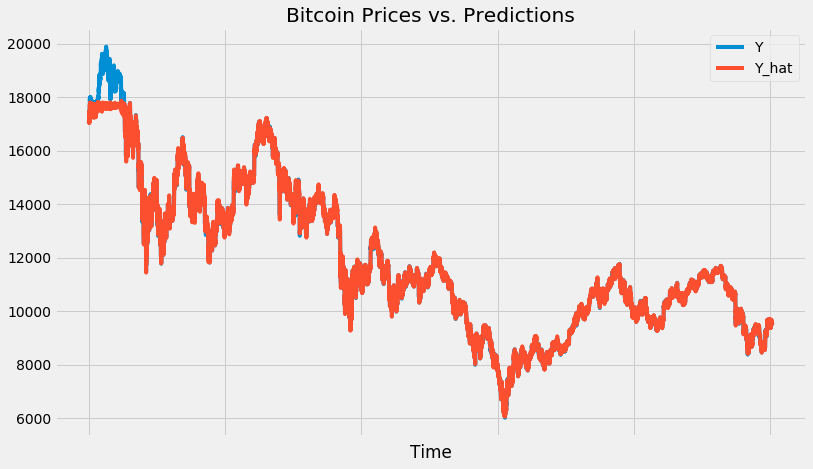

In [11]:
results = pd.DataFrame({'Y': y_test, 'Y_hat': gbr.predict(x_test)})
display(results.head())

plt.style.use('fivethirtyeight')
plt.tight_layout()
results.plot(figsize=(12,7), title="Bitcoin Prices vs. Predictions")

In [12]:
results.shape

(25078, 2)

In [13]:
df = pd.DataFrame(results.iloc[25040:,1])

window = 3
no_of_std = 0.5

#Calculate rolling mean and standard deviation using number of days set above
rolling_mean = df['Y_hat'].rolling(window).mean()
rolling_std = df['Y_hat'].rolling(window).std()

#Add to table
df['Rolling Mean'] = rolling_mean
df['Bollinger High'] = rolling_mean + (rolling_std * no_of_std)
df['Bollinger Low'] = rolling_mean - (rolling_std * no_of_std)

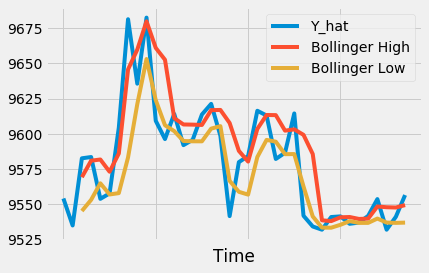

In [14]:
df[['Y_hat','Bollinger High','Bollinger Low']].plot()

In [15]:
# careful notic, I changed 1 and -1 signals. They are normally in the inverse order. 
def bollinger_strat(df,window,std):
    rolling_mean = df['Y_hat'].rolling(window).mean()
    rolling_std = df['Y_hat'].rolling(window).std()
    
    df['Bollinger High'] = rolling_mean + (rolling_std * no_of_std)
    df['Bollinger Low'] = rolling_mean - (rolling_std * no_of_std)
    
    df['Short'] = None
    df['Long'] = None
    df['Position'] = None
    
    for row in range(len(df)):
    
        if (df['Y_hat'].iloc[row] > df['Bollinger High'].iloc[row]) and (df['Y_hat'].iloc[row-1] < df['Bollinger High'].iloc[row-1]):
            df['Position'].iloc[row] = 1
        
        if (df['Y_hat'].iloc[row] < df['Bollinger Low'].iloc[row]) and (df['Y_hat'].iloc[row-1] > df['Bollinger Low'].iloc[row-1]):
            df['Position'].iloc[row] = -1
            
    df['Position'].fillna(method='ffill',inplace=True)
    
    df['Market Return'] = np.log(df['Y_hat'] / df['Y_hat'].shift(1))
    df['Strategy Return'] = df['Market Return'] * df['Position']
    
    df['Strategy Return'].cumsum().plot()

/anaconda3/envs/data-x/lib/python3.6/site-packages/pandas/core/indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


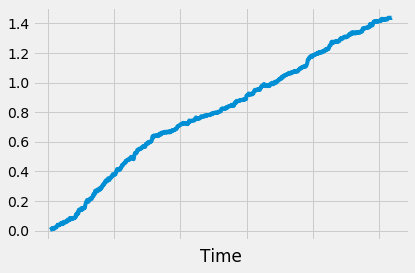

In [16]:
#Return using B band as decision signals 
df = pd.DataFrame(results.iloc[24040:,1])

window = 5
no_of_std = 1
bollinger_strat(df, window, no_of_std)

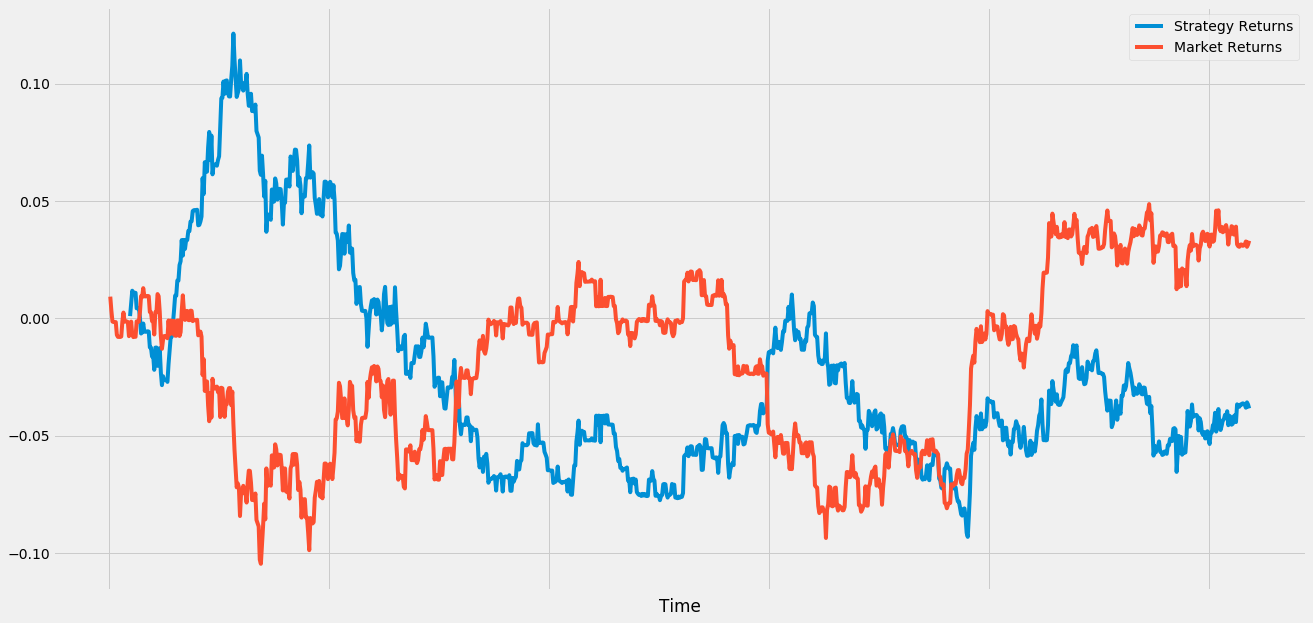

In [17]:
#Adapt from http://www.pythonforfinance.net/2017/10/10/stochastic-oscillator-trading-strategy-backtest-in-python/#more-15863
df['L14'] = df['Y_hat'].rolling(window=14).min()
df['H14'] = df['Y_hat'].rolling(window=14).max()

df['%K'] = 100*((df['Y_hat'] - df['L14']) / (df['H14'] - df['L14']) )
df['%D'] = df['%K'].rolling(window=3).mean()

df['Sell Entry'] = ((df['%K'] > df['%D']) & (df['%K'].shift(1) < df['%D'].shift(1))) & (df['%D'] < 80)
df['Buy Entry'] = ((df['%K'] < df['%D']) & (df['%K'].shift(1) > df['%D'].shift(1))) & (df['%D'] > 20)

#Create empty "Position" column
df['Position'] = np.nan

#Set position to -1 for sell signals
df.loc[df['Sell Entry'],'Position'] = -1

#Set position to -1 for buy signals
df.loc[df['Buy Entry'],'Position'] = 1

#Forward fill the position column to show holding of positions through time
df['Position'] = df['Position'].fillna(method='ffill')
 
#Set up a column holding the daily Apple returns
df['Market Returns'] = df['Y_hat'].pct_change()
 
#Create column for Strategy Returns by multiplying the daily Apple returns by the position that was held at close
#of business the previous day
df['Strategy Returns'] = df['Market Returns'] * df['Position'].shift(1)
 
#Finally plot the strategy returns versus Apple returns
df[['Strategy Returns','Market Returns']].cumsum().plot(figsize=(20,10))